In [26]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessings
from sklearn.preprocessing import StandardScaler, LabelEncoder

# NLP
from sentence_transformers import SentenceTransformer

# Misc
import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')

In [27]:
# load data
df = pd.read_csv("../dataset/eCommerce_Customer_support_data.csv")
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [28]:
# Basic Info
df.shape

(85907, 20)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [30]:
# check for missing values in the dataset
missing = df.isnull().sum().sort_values(ascending = False)
missing = missing[missing > 0]
missing

connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
dtype: int64

In [31]:
# check unique values per column
df.nunique().sort_values(ascending = False).head(15)

Unique id                  85907
Order_id                   67675
Issue_reported at          30923
issue_responded            30262
Customer Remarks           18231
order_date_time            13766
Item_price                  2789
Customer_City               1782
Agent_name                  1371
connected_handling_time      211
Sub-category                  57
Supervisor                    40
Survey_response_Date          31
category                      12
Product_category               9
dtype: int64

In [41]:
# Data Cleaning

# Drop Duplicates
df.drop_duplicates(inplace = True)

# Fill key columns
fill_defaults = {
    "Customer Remarks": "",
    "Channel name":"Unknown",
    "Category":"General",
    "Sub-Category":"Misc"
}

df.fillna(fill_defaults, inplace = True)

# Convert to datetime if applicable
date_cols = ['order_date_time', 'Issue_reported at', 'issue_responded','Survey_response_Date', 'connected_handling_time']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')       

In [42]:
df.columns

Index(['unique_id', 'channel_name', 'category', 'sub_category',
       'customer_remarks', 'order_id', 'order_date_time', 'issue_reported_at',
       'issue_responded', 'survey_response_date', 'customer_city',
       'product_category', 'item_price', 'connected_handling_time',
       'agent_name', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift',
       'csat_score'],
      dtype='object')

In [34]:
## Exploratory Data Analysis(EDA)

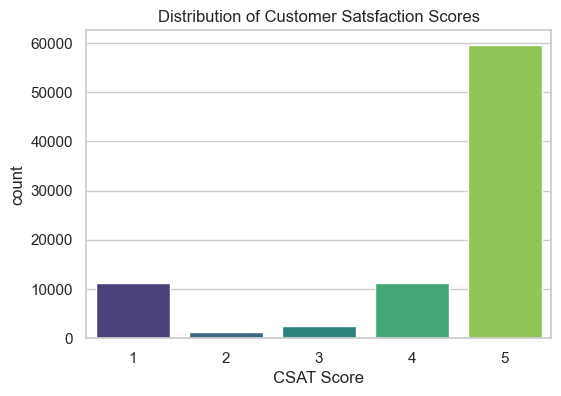

In [35]:
# Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x = 'CSAT Score', data = df, palette = 'viridis')
plt.title('Distribution of Customer Satsfaction Scores')
plt.show()

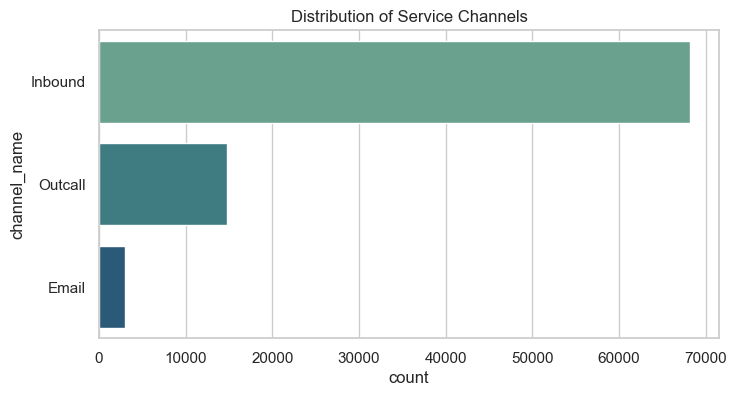

In [36]:
# Channel Analysis
plt.figure(figsize= (8,4))
sns.countplot(y = 'channel_name', data = df, order = df['channel_name'].value_counts().index, palette = 'crest')
plt.title('Distribution of Service Channels')
plt.show()

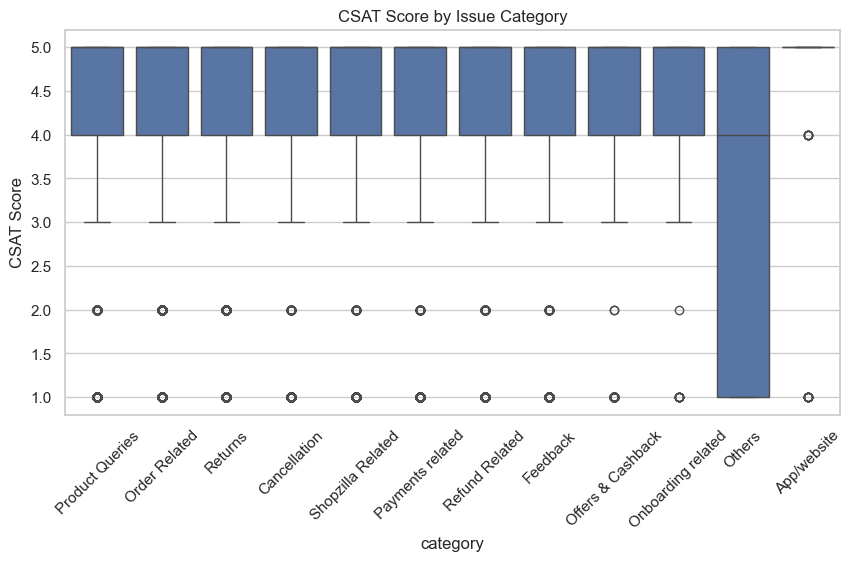

In [37]:
# Category vs CSAT
plt.figure(figsize=(10,5))
sns.boxplot(x='category',y='CSAT Score', data=df)
plt.xticks(rotation=45)
plt.title('CSAT Score by Issue Category')
plt.show()

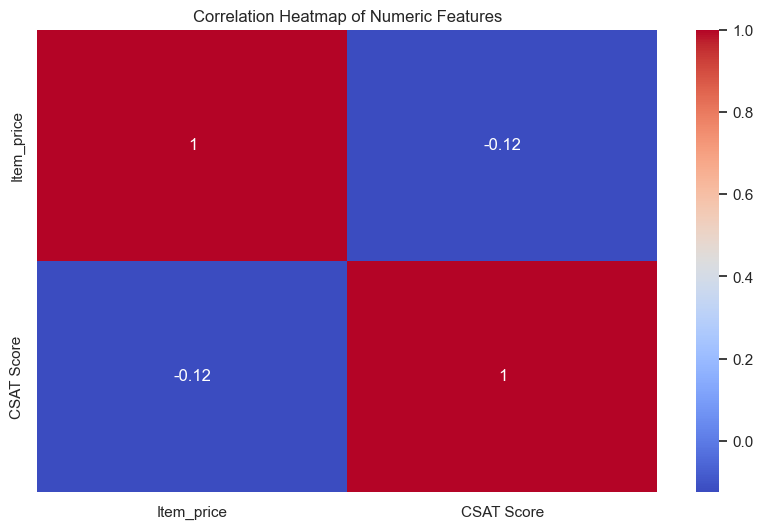

In [38]:
# Correlation HeatMap (Numeric Features)
numeric_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), cmap = 'coolwarm', annot = True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Feature Enginnering

In [43]:
def clean_column_names(df):
    """
    Clean and standardize column names for consistency.
    - Strips whitespace
    - Converts to lowercase
    - Replaces spaces, hyphens, and slashes with underscores
    - Removes duplicate underscores
    - Ensures unique column names if duplicates occur
    """
    cleaned_cols = []
    seen = {}

    for col in df.columns:
        # Basic normalization
        new_col = (
            col.strip()
               .lower()
               .replace(" ", "_")
               .replace("-", "_")
               .replace("/", "_")
        )
        # Remove duplicate underscores
        while "__" in new_col:
            new_col = new_col.replace("__", "_")
        
        # Handle duplicate column names
        if new_col in seen:
            seen[new_col] += 1
            new_col = f"{new_col}_{seen[new_col]}"
        else:
            seen[new_col] = 0

        cleaned_cols.append(new_col)

    df.columns = cleaned_cols
    return df

In [44]:
df = clean_column_names(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   unique_id                85907 non-null  object        
 1   channel_name             85907 non-null  object        
 2   category                 85907 non-null  object        
 3   sub_category             85907 non-null  object        
 4   customer_remarks         85907 non-null  object        
 5   order_id                 67675 non-null  object        
 6   order_date_time          17214 non-null  datetime64[ns]
 7   issue_reported_at        31974 non-null  datetime64[ns]
 8   issue_responded          31885 non-null  datetime64[ns]
 9   survey_response_date     85907 non-null  datetime64[ns]
 10  customer_city            17079 non-null  object        
 11  product_category         17196 non-null  object        
 12  item_price               17206 n

In [45]:
# Temporal Features
if "issue_reported_at" in df.columns and "issue_responded" in df.columns:
    df['resposne_delay_hrs'] = (df['issue_responded'] - df['issue_reported_at']).dt.total_seconds() / 3600

In [46]:
# Label Encoding for Categorical Columns
categorical_cols = ['channel_name','category','sub_category','agent_shift']
encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

In [47]:
df.columns

Index(['unique_id', 'channel_name', 'category', 'sub_category',
       'customer_remarks', 'order_id', 'order_date_time', 'issue_reported_at',
       'issue_responded', 'survey_response_date', 'customer_city',
       'product_category', 'item_price', 'connected_handling_time',
       'agent_name', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift',
       'csat_score', 'resposne_delay_hrs'],
      dtype='object')

In [48]:
# scaling numerical features
scaler = StandardScaler()
numeric_cols = ['item_price','response_delay_hrs','connected_handling_time']
for col in numeric_cols:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

In [49]:
# Text Embedding Generation
text_col = 'customer_remarks'
model = SentenceTransformer('all-MiniLM-L6-v2')

print("Generating Text Embeddings...")
embeddings = model.encode(df[text_col].astype(str).tolist(),show_progress_bar = True)

# Combine embeddings with numeric features
embed_df = pd.DataFrame(embeddings, columns=[f"embed_{i}" for i in range(embeddings.shape[1])])
df_final = pd.concat([df.reset_index(drop=True), embed_df], axis=1)
print("Embeddings generated successfully:", df_final.shape)

Generating Text Embeddings...


Batches:   0%|          | 0/2685 [00:00<?, ?it/s]

Embeddings generated successfully: (85907, 405)


In [51]:
df_final.to_csv("../dataset/processed_deepcsat.csv", index=False)
print("Processed data saved to /data/processed_deepcsat.csv")

Processed data saved to /data/processed_deepcsat.csv


In [52]:
print("Final dataset shape:", df_final.shape)
print("Columns prepared for modeling:", df_final.columns[:20])

Final dataset shape: (85907, 405)
Columns prepared for modeling: Index(['unique_id', 'channel_name', 'category', 'sub_category',
       'customer_remarks', 'order_id', 'order_date_time', 'issue_reported_at',
       'issue_responded', 'survey_response_date', 'customer_city',
       'product_category', 'item_price', 'connected_handling_time',
       'agent_name', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift',
       'csat_score'],
      dtype='object')
